In [9]:
import fil_finder
from fil_finder import FilFinder2D, Filament2D
from astropy.io import fits
from scipy.stats import norm
import copy
import pandas as pd

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

# Optional settings for the plots. Comment out if needed.
# import seaborn as sb
# sb.set_context('poster')

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12., 9.6)

In [11]:
from astropy.wcs import WCS
import numpy as np
from spectral_cube import Projection
import astropy
import aplpy
import glob

In [12]:
def v2ch(v, w): # v(km/s)をchに変える
    x_tempo, y_tempo, v_tempo   = w.wcs_pix2world(0, 0, 0, 0)
    x_ch, y_ch, v_ch   = w.wcs_world2pix(x_tempo, y_tempo, v*1000.0, 0)
    v_ch = int(round(float(v_ch), 0))
    return v_ch

def del_header_key(header, keys): # headerのkeyを消す
    import copy
    h = copy.deepcopy(header)
    for k in keys:
        try:
            del h[k]
        except:
            pass
    return h
def make_new_hdu_integ(hdu, v_start_wcs, v_end_wcs, w): # 積分強度のhduを作る
    data = hdu.data
    header = hdu.header
    start_ch, end_ch = v2ch(v_start_wcs, w), v2ch(v_end_wcs, w)
    new_data = np.nansum(data[start_ch:end_ch+1], axis=0)*np.abs(header["CDELT3"])/1000.0
    header = del_header_key(header, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
    header["NAXIS"] = 2
#     header["CTYPE1"] = "GLON-CAR"
#     header["CTYPE2"] = "GLAT-CAR"
    new_data[new_data==0.0]=np.nan
    try:
        header["WCSAXES"] = 2
    except:
        pass
    new_hdu = fits.PrimaryHDU(new_data, header)
    return new_hdu

In [8]:
# fits_pwd_ls =glob.glob("/home/filament/Desktop/fil-test/projection_check/*")
fits_pwd_ls =glob.glob("/home/filament/Desktop/fil-test/test_1_TAN.fits")
fits_pwd =fits_pwd_ls
print(fits_pwd)

hdu = fits.open(fits_pwd)[0]
w = WCS(fits_pwd)

#arr = np.nanmax(hdu.data[:, :256, :256], axis=0).astype(">f4")
# arr = hdu.data[468, :256, :256].astype(">f4")
arr = hdu.data[500, :278, :267].astype(">f4")

['/home/filament/Desktop/fil-test/test_1_TAN.fits']


OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

In [6]:
hdu.data.shape

(933, 240, 590)

In [7]:
np.nanmax(arr)

1.631003

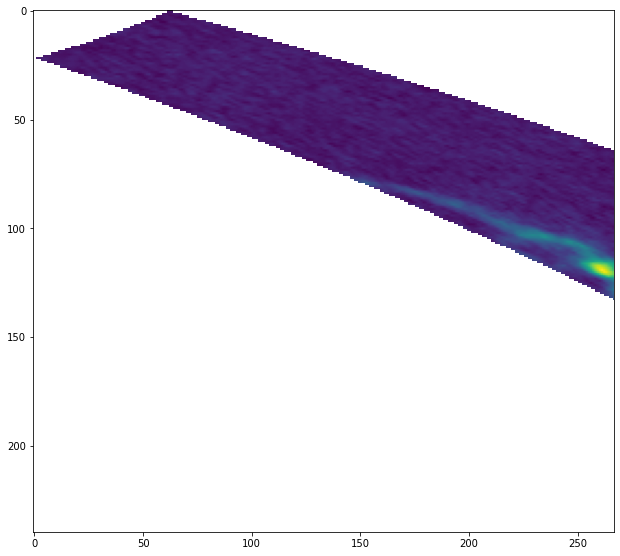

In [8]:
plt.imshow(arr)

In [6]:
fits_pwd_ls

['/home/filament/Desktop/fil-test/fil_finder_fits/TAN/test_1_TAN.fits']

In [9]:
fits_pwd.split('/')[7].split('.')[0]

'test_1_TAN'

In [10]:
hdu.header["CUNIT1"] = "deg"
hdu.header["CUNIT2"] = "deg"
hdu.header["BPA"] = 0.0
hdu.header["BMAJ"] = 0.2706
hdu.header["BMIN"] = 0.2706
hdu.header["LONPOLE"] = 0.0
hdu.header["LATPOLE"] = 90.0

In [11]:
##########
integ_hdu = make_new_hdu_integ(hdu, 20.0, 50.0, w)
##########

In [12]:
hdr1 = fits.PrimaryHDU().header
hdr1["BITPIX"] = integ_hdu.header["BITPIX"]
hdr1["NAXIS"] = integ_hdu.header["NAXIS"]
hdr1["NAXIS1"] = integ_hdu.header["NAXIS1"]
hdr1["NAXIS2"] = integ_hdu.header["NAXIS2"]
# hdr1["CDELT1"] = integ_hdu.header["CDELT1"]
# hdr1["CDELT2"] = integ_hdu.header["CDELT2"]
hdr1["CDELT1"] = -0.01
hdr1["CDELT2"] = 0.01
hdr1["CRVAL1"] = integ_hdu.header["CRVAL1"]
hdr1["CRVAL2"] = integ_hdu.header["CRVAL2"]
hdr1["CRPIX1"] = integ_hdu.header["CRPIX1"]
hdr1["CRPIX2"] = integ_hdu.header["CRPIX2"]
hdr1["CTYPE1"] = integ_hdu.header["CTYPE1"]
hdr1["CTYPE2"] = integ_hdu.header["CTYPE2"]
hdr1["CUNIT1"] = integ_hdu.header["CUNIT1"]
hdr1["CUNIT2"] = integ_hdu.header["CUNIT2"]
hdr1["BPA"] = integ_hdu.header["BPA"]
hdr1["BMAJ"] = integ_hdu.header["BMAJ"]
hdr1["BMIN"] = integ_hdu.header["BMIN"]
hdr1["LONPOLE"] = integ_hdu.header["LONPOLE"]
hdr1["LATPOLE"] = integ_hdu.header["LATPOLE"]


In [14]:
def make_integ_filament_array(hdu,v_start,v_end,d,bmaj,cdelt,vmin,vmax):
    w = WCS(hdu)
    
    ##########################
#     wcs = WCS(hdu.header)
    ##########################
    
    
    integ_hdu = make_new_hdu_integ(hdu, v_start, v_end, w)
    integ_hdu.data[integ_hdu.data<=0.01]=np.nan  ####0.01
#     integ_hdu.data[integ_hdu.data<=0]=np.nan  ####0.01
    hdr1 = fits.PrimaryHDU().header
    hdr1["BITPIX"] = integ_hdu.header["BITPIX"]
    hdr1["NAXIS"] = integ_hdu.header["NAXIS"]
    hdr1["NAXIS1"] = integ_hdu.header["NAXIS1"]
    hdr1["NAXIS2"] = integ_hdu.header["NAXIS2"]
    # hdr1["CDELT1"] = integ_hdu.header["CDELT1"]
    # hdr1["CDELT2"] = integ_hdu.header["CDELT2"]
    hdr1["CDELT1"] = -cdelt
    hdr1["CDELT2"] = cdelt
    hdr1["CRVAL1"] = integ_hdu.header["CRVAL1"]
    hdr1["CRVAL2"] = integ_hdu.header["CRVAL2"]
    hdr1["CRPIX1"] = integ_hdu.header["CRPIX1"]
    hdr1["CRPIX2"] = integ_hdu.header["CRPIX2"]
    hdr1["CTYPE1"] = integ_hdu.header["CTYPE1"]
    hdr1["CTYPE2"] = integ_hdu.header["CTYPE2"]
    hdr1["CUNIT1"] = integ_hdu.header["CUNIT1"]
    hdr1["CUNIT2"] = integ_hdu.header["CUNIT2"]
#     hdr1["BPA"] = integ_hdu.header["BPA"]
#     hdr1["BMAJ"] = integ_hdu.header["BMAJ"]
#     hdr1["BMIN"] = integ_hdu.header["BMIN"]
#     hdr1["LONPOLE"] = integ_hdu.header["LONPOLE"]
#     hdr1["LATPOLE"] = integ_hdu.header["LATPOLE"]

    
    
    fil = FilFinder2D(fits.PrimaryHDU(integ_hdu.data, hdr1), distance=d * u.pc, beamwidth=bmaj* u.deg)

    fil.preprocess_image(flatten_percent=95)
    fil.create_mask(verbose=True)
    fil.medskel(verbose=True)
    fil_skeleton= fil.skeleton
    fil_skeleton = fil_skeleton.astype("int")
    hdr2 = copy.deepcopy(hdu.header)
    hdr2 = del_header_key(hdr2, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
    hdr2["NAXIS"]=2
    hdr2["WCSAXES"]=2
    
    fig = aplpy.FITSFigure(integ_hdu,slices=[0])
    fig.show_colorscale(vmin=vmin,vmax=vmax,stretch="log")
    fig.add_colorbar()
    fig.show_contour(fits.PrimaryHDU(fil_skeleton,hdr2),colors="r",linewidths=0.5,slices=[0])
    fig.add_grid()
    fig.set_title("%ikm/s~%ikm/s_distance = %ipc"%(v_start,v_end,d))
    fig.savefig("/home/filament/Downloads/fil_remake/%i_%i_%i.png"%(v_start,v_end,d))
    integ_hdu.writeto("/home/filament/Downloads/fil_remake/%s_%i_%i.fits"%(fits_pwd.split('/')[6].split('.')[0],v_start,v_end), overwrite=True)
    
    
#     plt.clf()
    
#     fil.analyze_skeletons()
#     fil.exec_rht()
    
#     ypos = np.array([f.position()[0].value for f in fil.filaments])
    
#     ########################################
    
# #     print(fil.filaments[0].position())
# #     print(w.wcs_pix2world(fil.filaments[0].position()[0],fil.filaments[0].position()[1],0,0))
# #     print(fil.filaments[0].orientation)
# #     print(w.wcs_pix2world(fil.filaments[0].position()[0],fil.filaments[0].position()[1],0))
#     ########################################

#     ori = np.array(np.rad2deg(fil.orientation))
#     ori2 = ori
#     ori2 = ori2[ypos<=800]
#     plt.hist(ori2,alpha=0.5,bins=np.linspace(-90,90,num=18))
#     plt.savefig("/home/filament/Downloads/fil_remake/%i_%i_%i_hist.png"%(v_start,v_end,d))

AIT

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filfinder2D.py:355: UserWarning: Adaptive thresholding patch is larger than 40pixels. Regridding has been disabled.
  warnings.warn("Adaptive thresholding patch is larger than 40"


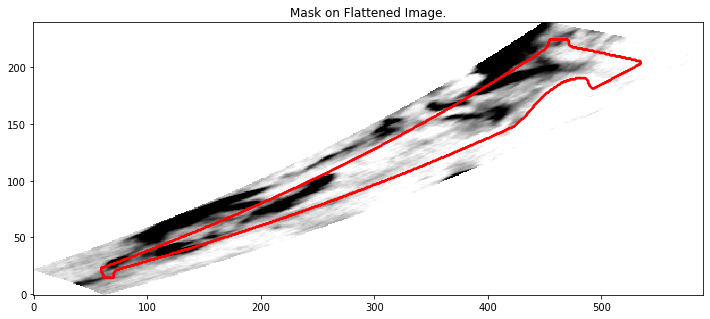

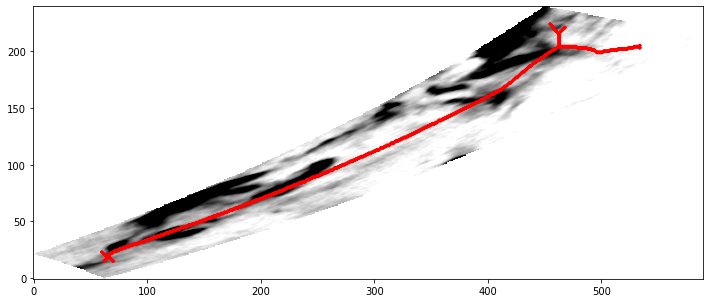

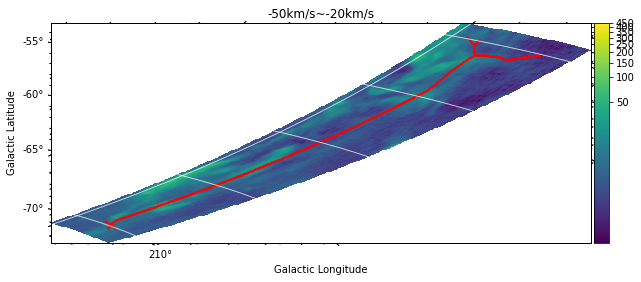

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


<Figure size 864x691.2 with 0 Axes>

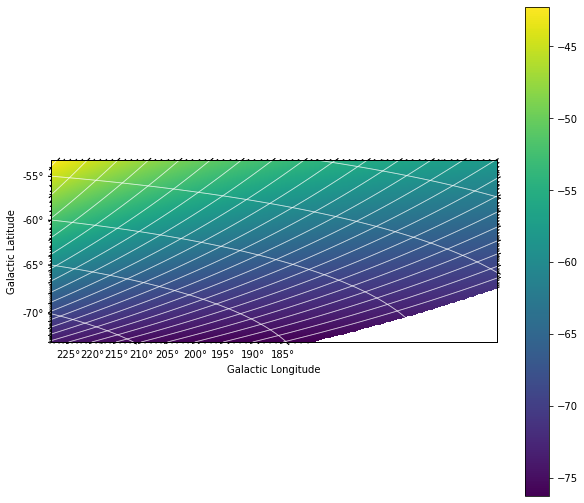

In [15]:
w = WCS(hdu)


v_start,v_end,d,bmaj,cdelt,vmin,vmax = -50,-20,2000,0.2706,0.083333333,1,450
##########################
#     wcs = WCS(hdu.header)
##########################


integ_hdu = make_new_hdu_integ(hdu, v_start, v_end, w)
integ_hdu.data[integ_hdu.data<=0.01]=np.nan  ####0.01
hdr1 = fits.PrimaryHDU().header
hdr1["BITPIX"] = integ_hdu.header["BITPIX"]
hdr1["NAXIS"] = integ_hdu.header["NAXIS"]
hdr1["NAXIS1"] = integ_hdu.header["NAXIS1"]
hdr1["NAXIS2"] = integ_hdu.header["NAXIS2"]
# hdr1["CDELT1"] = integ_hdu.header["CDELT1"]
# hdr1["CDELT2"] = integ_hdu.header["CDELT2"]
hdr1["CDELT1"] = -cdelt
hdr1["CDELT2"] = cdelt
hdr1["CRVAL1"] = integ_hdu.header["CRVAL1"]
hdr1["CRVAL2"] = integ_hdu.header["CRVAL2"]
hdr1["CRPIX1"] = integ_hdu.header["CRPIX1"]
hdr1["CRPIX2"] = integ_hdu.header["CRPIX2"]
hdr1["CTYPE1"] = integ_hdu.header["CTYPE1"]
hdr1["CTYPE2"] = integ_hdu.header["CTYPE2"]
hdr1["CUNIT1"] = integ_hdu.header["CUNIT1"]
hdr1["CUNIT2"] = integ_hdu.header["CUNIT2"]
#     hdr1["BPA"] = integ_hdu.header["BPA"]
#     hdr1["BMAJ"] = integ_hdu.header["BMAJ"]
#     hdr1["BMIN"] = integ_hdu.header["BMIN"]
#     hdr1["LONPOLE"] = integ_hdu.header["LONPOLE"]
#     hdr1["LATPOLE"] = integ_hdu.header["LATPOLE"]



fil = FilFinder2D(fits.PrimaryHDU(integ_hdu.data, hdr1), distance=d * u.pc, beamwidth=bmaj* u.deg)

fil.preprocess_image(flatten_percent=95)
# fil.create_mask(verbose=True)
fil.create_mask(verbose=True,size_thresh=(np.pi * 5 * 0.1**2 * u.pc**2)*d,smooth_size = d*0.05 * u.pc,adapt_thresh = 0.2 * u.pc*d)
fil.medskel(verbose=True)
fil_skeleton= fil.skeleton
fil_skeleton = fil_skeleton.astype("int")
hdr2 = copy.deepcopy(hdu.header)
hdr2 = del_header_key(hdr2, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
hdr2["NAXIS"]=2
hdr2["WCSAXES"]=2

fig = aplpy.FITSFigure(integ_hdu,slices=[0])
fig.show_colorscale(vmin=vmin,vmax=vmax,stretch="log")
fig.add_colorbar()
fig.show_contour(fits.PrimaryHDU(fil_skeleton,hdr2),colors="r",linewidths=0.5,slices=[0])
fig.add_grid()
fig.set_title("%ikm/s~%ikm/s"%(v_start,v_end))
# fig.savefig("/home/filament/Downloads/fil_remake/%s_%i_%i.png"%(fits_pwd.split('/')[6].split('.')[0],v_start,v_end))
# integ_hdu.writeto("/home/filament/Downloads/fil_remake/%i_%i.fits"%(v_start,v_end), overwrite=True)
plt.show()

plt.clf()

fil.analyze_skeletons()
fil.exec_rht()

ypos = np.array([f.position()[0].value for f in fil.filaments])


lean_ls = []
pa_deg_map = np.zeros(hdu.data.shape[1:])
for i in range(hdu.data.shape[2]):
    for j in range(hdu.data.shape[1]):
        
        pos = w.wcs_pix2world(i,j,0,0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            lean_ls.append(0)
            pa_deg_map[[j],[i]]=np.nan
            continue
        slide_plus = np.array([pos[0],pos[1]+0.0001])
        slide_minus = np.array([pos[0],pos[1]-0.0001])
        slide_plus_pix = w.wcs_world2pix(slide_plus[0],slide_plus[1],0,0)
        slide_minus_pix = w.wcs_world2pix(slide_minus[0],slide_minus[1],0,0)
        vec = np.array(slide_plus_pix) - np.array(slide_minus_pix)
#         vec = np.array([slide_plus_pix[0]-slide_minus_pix[0],slide_plus_pix[1]-slide_minus_pix[1]])
        lean = -vec[0]/vec[1]  #
#         print(lean)
#         print(np.arctan(lean))
        lean_ls.append(np.rad2deg(np.arctan(lean)))
        pa_deg_map[[j],[i]]=np.rad2deg(np.arctan(lean))
        
fig = aplpy.FITSFigure(integ_hdu,slices=[0])

plt.imshow(pa_deg_map)
fig.add_grid()
plt.colorbar()
fig.ticks.set_xspacing(5)
fig.ticks.set_yspacing(5)
   
fil_ori_ = []
for f in fil.filaments:
    pa = np.rad2deg(f.orientation.value)-pa_deg_map[int(f.position()[0].value)][int(f.position()[1].value)]
    fil_ori_.append(pa)
fil_ori_=np.array(fil_ori_)
ypos = np.array([f.position()[0].value for f in fil.filaments])
fil_ori_=np.where(fil_ori_<-90,fil_ori_+180,fil_ori_)
fil_ori_=np.where(fil_ori_>90,fil_ori_-180,fil_ori_)
# -90deg以下のものには+180deg、90deg以上のものには-180degをして±90degの範囲に収める。
# plt.hist(fil_ori_[ypos>400],alpha=0.5,bins=np.linspace(-90,90,num=18))


TAN

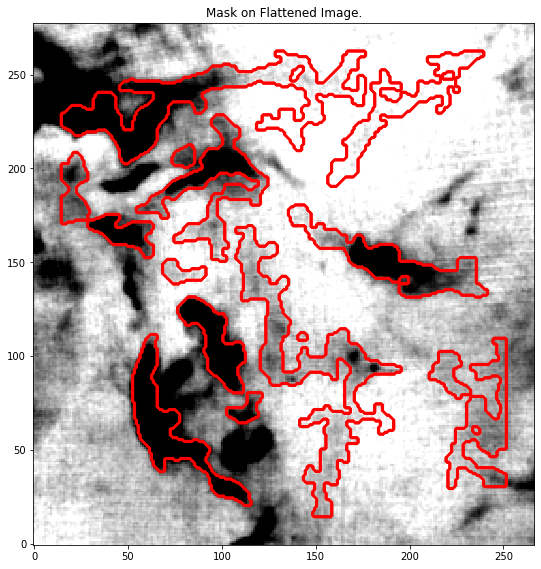

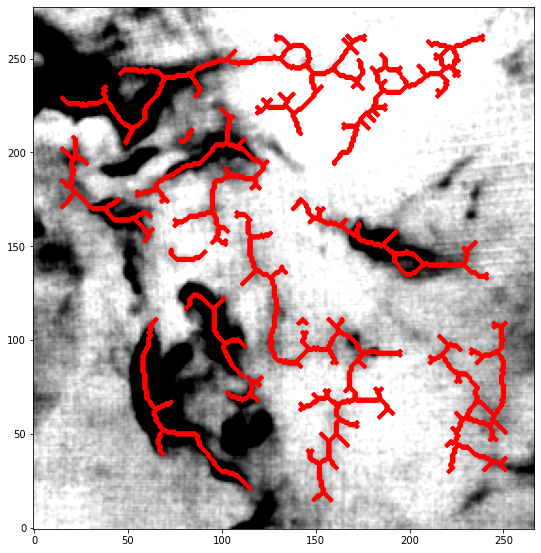

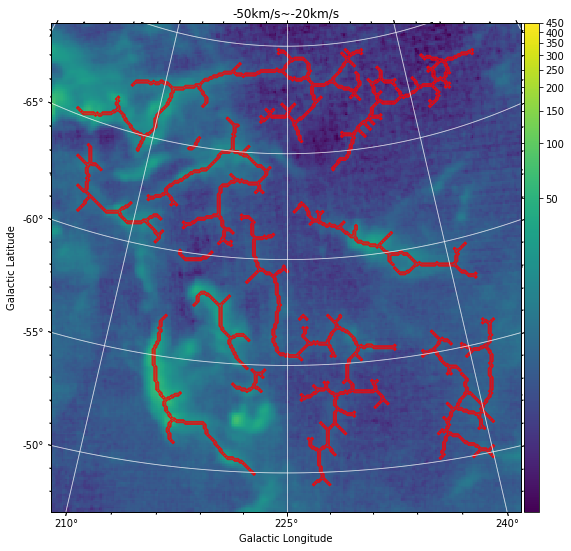

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


<Figure size 864x691.2 with 0 Axes>

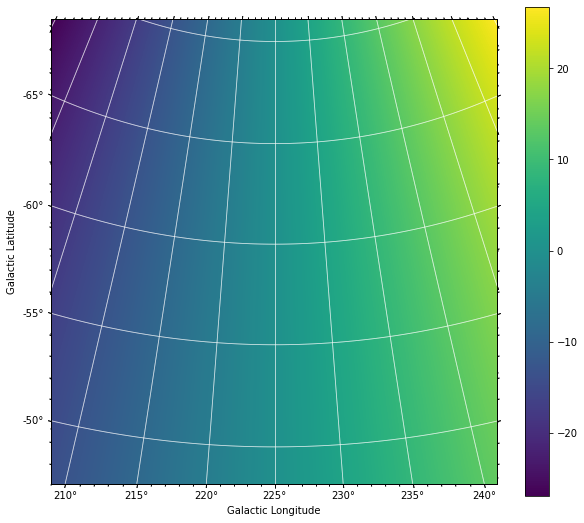

In [68]:
w = WCS(hdu)


v_start,v_end,d,bmaj,cdelt,vmin,vmax = -50,-20,10,0.2706,0.083333333,1,450
##########################
#     wcs = WCS(hdu.header)
##########################


integ_hdu = make_new_hdu_integ(hdu, v_start, v_end, w)
integ_hdu.data[integ_hdu.data<=0.01]=np.nan  ####0.01
hdr1 = fits.PrimaryHDU().header
hdr1["BITPIX"] = integ_hdu.header["BITPIX"]
hdr1["NAXIS"] = integ_hdu.header["NAXIS"]
hdr1["NAXIS1"] = integ_hdu.header["NAXIS1"]
hdr1["NAXIS2"] = integ_hdu.header["NAXIS2"]
# hdr1["CDELT1"] = integ_hdu.header["CDELT1"]
# hdr1["CDELT2"] = integ_hdu.header["CDELT2"]
hdr1["CDELT1"] = -cdelt
hdr1["CDELT2"] = cdelt
hdr1["CRVAL1"] = integ_hdu.header["CRVAL1"]
hdr1["CRVAL2"] = integ_hdu.header["CRVAL2"]
hdr1["CRPIX1"] = integ_hdu.header["CRPIX1"]
hdr1["CRPIX2"] = integ_hdu.header["CRPIX2"]
hdr1["CTYPE1"] = integ_hdu.header["CTYPE1"]
hdr1["CTYPE2"] = integ_hdu.header["CTYPE2"]
hdr1["CUNIT1"] = integ_hdu.header["CUNIT1"]
hdr1["CUNIT2"] = integ_hdu.header["CUNIT2"]
#     hdr1["BPA"] = integ_hdu.header["BPA"]
#     hdr1["BMAJ"] = integ_hdu.header["BMAJ"]
#     hdr1["BMIN"] = integ_hdu.header["BMIN"]
#     hdr1["LONPOLE"] = integ_hdu.header["LONPOLE"]
#     hdr1["LATPOLE"] = integ_hdu.header["LATPOLE"]



fil = FilFinder2D(fits.PrimaryHDU(integ_hdu.data, hdr1), distance=d * u.pc, beamwidth=bmaj* u.deg)

fil.preprocess_image(flatten_percent=95)
fil.create_mask(verbose=True)
fil.medskel(verbose=True)
fil_skeleton= fil.skeleton
fil_skeleton = fil_skeleton.astype("int")
hdr2 = copy.deepcopy(hdu.header)
hdr2 = del_header_key(hdr2, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
hdr2["NAXIS"]=2
hdr2["WCSAXES"]=2

fig = aplpy.FITSFigure(integ_hdu,slices=[0])
fig.show_colorscale(vmin=vmin,vmax=vmax,stretch="log")
fig.add_colorbar()
fig.show_contour(fits.PrimaryHDU(fil_skeleton,hdr2),colors="r",linewidths=0.5,slices=[0])
fig.add_grid()
fig.set_title("%ikm/s~%ikm/s"%(v_start,v_end))
# fig.savefig("/home/filament/Downloads/fil_remake/%s_%i_%i.png"%(fits_pwd.split('/')[6].split('.')[0],v_start,v_end))
# integ_hdu.writeto("/home/filament/Downloads/fil_remake/%i_%i.fits"%(v_start,v_end), overwrite=True)
plt.show()

plt.clf()

fil.analyze_skeletons()
fil.exec_rht()

ypos = np.array([f.position()[0].value for f in fil.filaments])


lean_ls = []
pa_deg_map = np.zeros(hdu.data.shape[1:])
for i in range(hdu.data.shape[2]):
    for j in range(hdu.data.shape[1]):
        
        pos = w.wcs_pix2world(i,j,0,0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            lean_ls.append(0)
            pa_deg_map[[j],[i]]=np.nan
            continue
        slide_plus = np.array([pos[0],pos[1]+0.0001])
        slide_minus = np.array([pos[0],pos[1]-0.0001])
        slide_plus_pix = w.wcs_world2pix(slide_plus[0],slide_plus[1],0,0)
        slide_minus_pix = w.wcs_world2pix(slide_minus[0],slide_minus[1],0,0)
        vec = np.array(slide_plus_pix) - np.array(slide_minus_pix)
#         vec = np.array([slide_plus_pix[0]-slide_minus_pix[0],slide_plus_pix[1]-slide_minus_pix[1]])
        lean = -vec[0]/vec[1]  #
#         print(lean)
#         print(np.arctan(lean))
        lean_ls.append(np.rad2deg(np.arctan(lean)))
        pa_deg_map[[j],[i]]=np.rad2deg(np.arctan(lean))
        
fig = aplpy.FITSFigure(integ_hdu,slices=[0])

plt.imshow(pa_deg_map)
fig.add_grid()
plt.colorbar()
fig.ticks.set_xspacing(5)
fig.ticks.set_yspacing(5)
   
fil_ori_ = []
for f in fil.filaments:
    pa = np.rad2deg(f.orientation.value)-pa_deg_map[int(f.position()[0].value)][int(f.position()[1].value)]
    fil_ori_.append(pa)
fil_ori_=np.array(fil_ori_)
ypos = np.array([f.position()[0].value for f in fil.filaments])
fil_ori_=np.where(fil_ori_<-90,fil_ori_+180,fil_ori_)
fil_ori_=np.where(fil_ori_>90,fil_ori_-180,fil_ori_)
# -90deg以下のものには+180deg、90deg以上のものには-180degをして±90degの範囲に収める。
# plt.hist(fil_ori_[ypos>400],alpha=0.5,bins=np.linspace(-90,90,num=18))


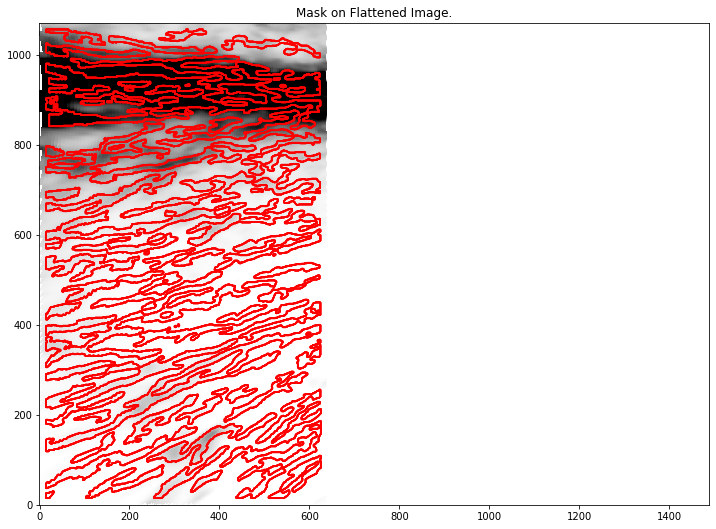

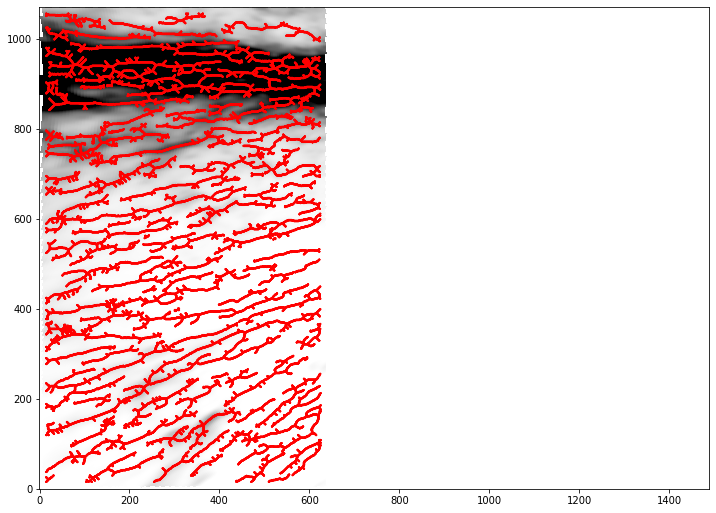

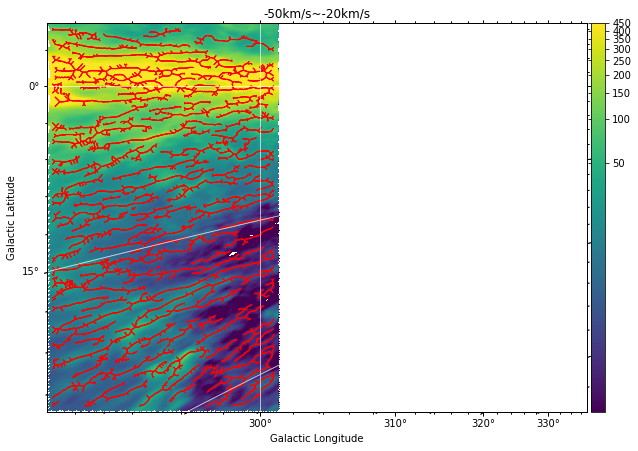

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


<Figure size 864x691.2 with 0 Axes>

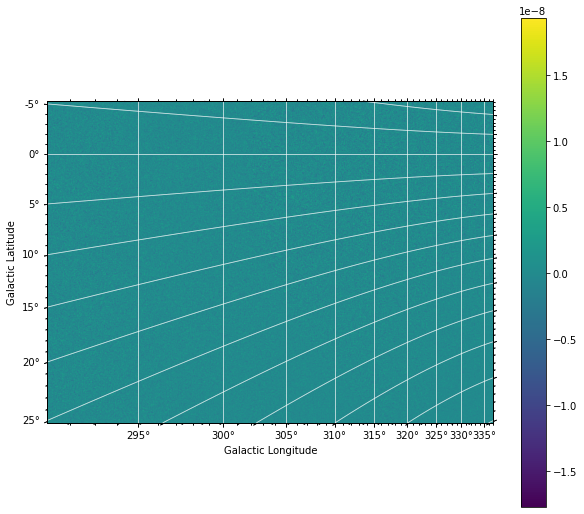

In [13]:
w = WCS(hdu)


v_start,v_end,d,bmaj,cdelt,vmin,vmax = -50,-20,10,0.2706,0.083333333,1,450
##########################
#     wcs = WCS(hdu.header)
##########################


integ_hdu = make_new_hdu_integ(hdu, v_start, v_end, w)
integ_hdu.data[integ_hdu.data<=0.01]=np.nan  ####0.01
hdr1 = fits.PrimaryHDU().header
hdr1["BITPIX"] = integ_hdu.header["BITPIX"]
hdr1["NAXIS"] = integ_hdu.header["NAXIS"]
hdr1["NAXIS1"] = integ_hdu.header["NAXIS1"]
hdr1["NAXIS2"] = integ_hdu.header["NAXIS2"]
# hdr1["CDELT1"] = integ_hdu.header["CDELT1"]
# hdr1["CDELT2"] = integ_hdu.header["CDELT2"]
hdr1["CDELT1"] = -cdelt
hdr1["CDELT2"] = cdelt
hdr1["CRVAL1"] = integ_hdu.header["CRVAL1"]
hdr1["CRVAL2"] = integ_hdu.header["CRVAL2"]
hdr1["CRPIX1"] = integ_hdu.header["CRPIX1"]
hdr1["CRPIX2"] = integ_hdu.header["CRPIX2"]
hdr1["CTYPE1"] = integ_hdu.header["CTYPE1"]
hdr1["CTYPE2"] = integ_hdu.header["CTYPE2"]
hdr1["CUNIT1"] = integ_hdu.header["CUNIT1"]
hdr1["CUNIT2"] = integ_hdu.header["CUNIT2"]
#     hdr1["BPA"] = integ_hdu.header["BPA"]
#     hdr1["BMAJ"] = integ_hdu.header["BMAJ"]
#     hdr1["BMIN"] = integ_hdu.header["BMIN"]
#     hdr1["LONPOLE"] = integ_hdu.header["LONPOLE"]
#     hdr1["LATPOLE"] = integ_hdu.header["LATPOLE"]



fil = FilFinder2D(fits.PrimaryHDU(integ_hdu.data, hdr1), distance=d * u.pc, beamwidth=bmaj* u.deg)

fil.preprocess_image(flatten_percent=95)
fil.create_mask(verbose=True)
fil.medskel(verbose=True)
fil_skeleton= fil.skeleton
fil_skeleton = fil_skeleton.astype("int")
hdr2 = copy.deepcopy(hdu.header)
hdr2 = del_header_key(hdr2, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
hdr2["NAXIS"]=2
hdr2["WCSAXES"]=2

fig = aplpy.FITSFigure(integ_hdu,slices=[0])
fig.show_colorscale(vmin=vmin,vmax=vmax,stretch="log")
fig.add_colorbar()
fig.show_contour(fits.PrimaryHDU(fil_skeleton,hdr2),colors="r",linewidths=0.5,slices=[0])
fig.add_grid()
fig.set_title("%ikm/s~%ikm/s"%(v_start,v_end))
# fig.savefig("/home/filament/Downloads/fil_remake/%s_%i_%i.png"%(fits_pwd.split('/')[6].split('.')[0],v_start,v_end))
# integ_hdu.writeto("/home/filament/Downloads/fil_remake/%i_%i.fits"%(v_start,v_end), overwrite=True)
plt.show()

plt.clf()

fil.analyze_skeletons()
fil.exec_rht()

ypos = np.array([f.position()[0].value for f in fil.filaments])


lean_ls = []
pa_deg_map = np.zeros(hdu.data.shape[1:])
for i in range(hdu.data.shape[2]):
    for j in range(hdu.data.shape[1]):
        
        pos = w.wcs_pix2world(i,j,0,0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            lean_ls.append(0)
            pa_deg_map[[j],[i]]=np.nan
            continue
        slide_plus = np.array([pos[0],pos[1]+0.0001])
        slide_minus = np.array([pos[0],pos[1]-0.0001])
        slide_plus_pix = w.wcs_world2pix(slide_plus[0],slide_plus[1],0,0)
        slide_minus_pix = w.wcs_world2pix(slide_minus[0],slide_minus[1],0,0)
        vec = np.array(slide_plus_pix) - np.array(slide_minus_pix)
#         vec = np.array([slide_plus_pix[0]-slide_minus_pix[0],slide_plus_pix[1]-slide_minus_pix[1]])
        lean = -vec[0]/vec[1]  #
#         print(lean)
#         print(np.arctan(lean))
        lean_ls.append(np.rad2deg(np.arctan(lean)))
        pa_deg_map[[j],[i]]=np.rad2deg(np.arctan(lean))
        
fig = aplpy.FITSFigure(integ_hdu,slices=[0])

plt.imshow(pa_deg_map)
fig.add_grid()
plt.colorbar()
fig.ticks.set_xspacing(5)
fig.ticks.set_yspacing(5)
   
fil_ori_ = []
for f in fil.filaments:
    pa = np.rad2deg(f.orientation.value)-pa_deg_map[int(f.position()[0].value)][int(f.position()[1].value)]
    fil_ori_.append(pa)
fil_ori_=np.array(fil_ori_)
ypos = np.array([f.position()[0].value for f in fil.filaments])
fil_ori_=np.where(fil_ori_<-90,fil_ori_+180,fil_ori_)
fil_ori_=np.where(fil_ori_>90,fil_ori_-180,fil_ori_)
# -90deg以下のものには+180deg、90deg以上のものには-180degをして±90degの範囲に収める。
# plt.hist(fil_ori_[ypos>400],alpha=0.5,bins=np.linspace(-90,90,num=18))


CAR

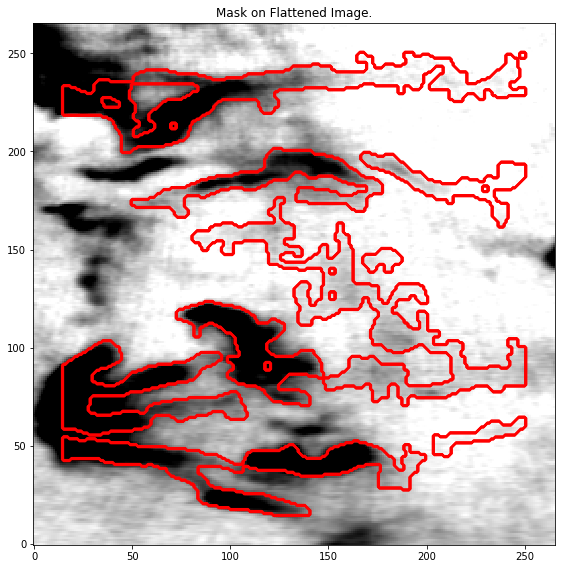

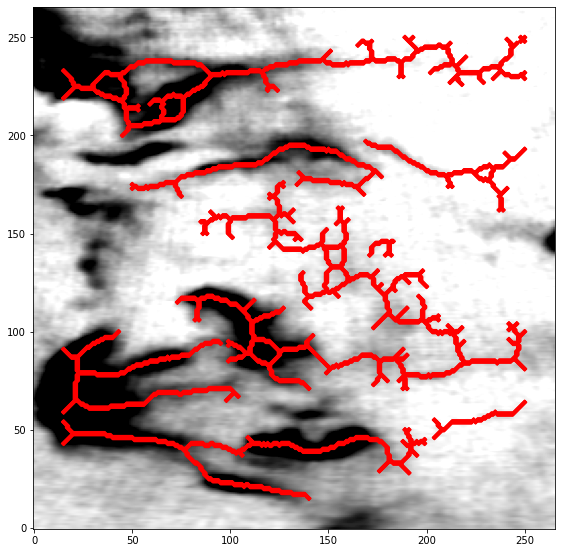

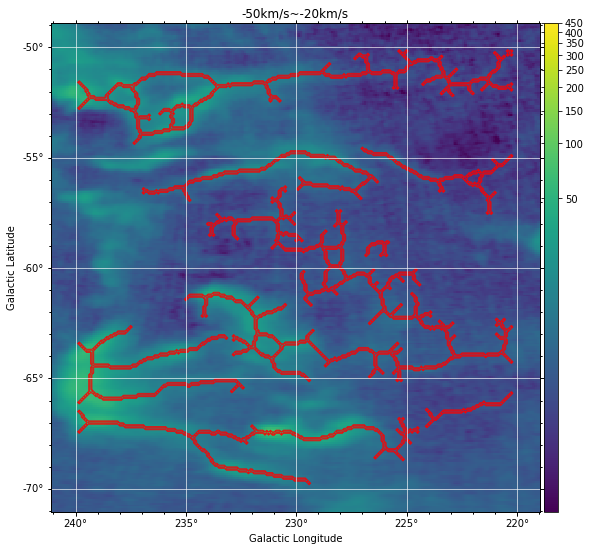

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


<Figure size 864x691.2 with 0 Axes>

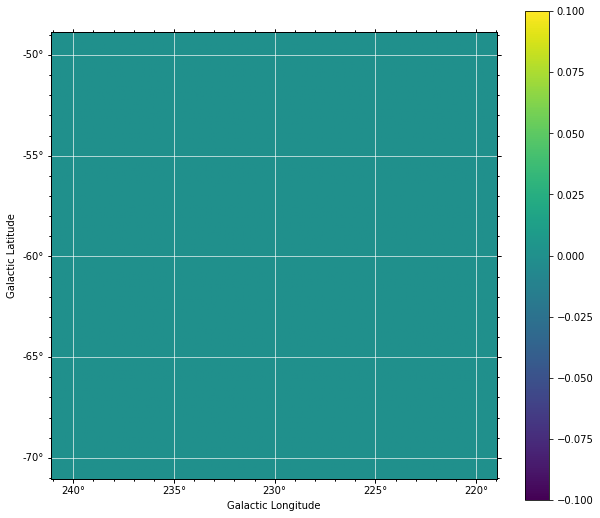

In [48]:
w = WCS(hdu)


v_start,v_end,d,bmaj,cdelt,vmin,vmax = -50,-20,10,0.2706,0.083333333,1,450
##########################
#     wcs = WCS(hdu.header)
##########################


integ_hdu = make_new_hdu_integ(hdu, v_start, v_end, w)
integ_hdu.data[integ_hdu.data<=0.01]=np.nan  ####0.01
hdr1 = fits.PrimaryHDU().header
hdr1["BITPIX"] = integ_hdu.header["BITPIX"]
hdr1["NAXIS"] = integ_hdu.header["NAXIS"]
hdr1["NAXIS1"] = integ_hdu.header["NAXIS1"]
hdr1["NAXIS2"] = integ_hdu.header["NAXIS2"]
# hdr1["CDELT1"] = integ_hdu.header["CDELT1"]
# hdr1["CDELT2"] = integ_hdu.header["CDELT2"]
hdr1["CDELT1"] = -cdelt
hdr1["CDELT2"] = cdelt
hdr1["CRVAL1"] = integ_hdu.header["CRVAL1"]
hdr1["CRVAL2"] = integ_hdu.header["CRVAL2"]
hdr1["CRPIX1"] = integ_hdu.header["CRPIX1"]
hdr1["CRPIX2"] = integ_hdu.header["CRPIX2"]
hdr1["CTYPE1"] = integ_hdu.header["CTYPE1"]
hdr1["CTYPE2"] = integ_hdu.header["CTYPE2"]
hdr1["CUNIT1"] = integ_hdu.header["CUNIT1"]
hdr1["CUNIT2"] = integ_hdu.header["CUNIT2"]
#     hdr1["BPA"] = integ_hdu.header["BPA"]
#     hdr1["BMAJ"] = integ_hdu.header["BMAJ"]
#     hdr1["BMIN"] = integ_hdu.header["BMIN"]
#     hdr1["LONPOLE"] = integ_hdu.header["LONPOLE"]
#     hdr1["LATPOLE"] = integ_hdu.header["LATPOLE"]



fil = FilFinder2D(fits.PrimaryHDU(integ_hdu.data, hdr1), distance=d * u.pc, beamwidth=bmaj* u.deg)

fil.preprocess_image(flatten_percent=95)
fil.create_mask(verbose=True)
fil.medskel(verbose=True)
fil_skeleton= fil.skeleton
fil_skeleton = fil_skeleton.astype("int")
hdr2 = copy.deepcopy(hdu.header)
hdr2 = del_header_key(hdr2, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
hdr2["NAXIS"]=2
hdr2["WCSAXES"]=2

fig = aplpy.FITSFigure(integ_hdu,slices=[0])
fig.show_colorscale(vmin=vmin,vmax=vmax,stretch="log")
fig.add_colorbar()
fig.show_contour(fits.PrimaryHDU(fil_skeleton,hdr2),colors="r",linewidths=0.5,slices=[0])
fig.add_grid()
fig.set_title("%ikm/s~%ikm/s"%(v_start,v_end))
# fig.savefig("/home/filament/Downloads/fil_remake/%s_%i_%i.png"%(fits_pwd.split('/')[6].split('.')[0],v_start,v_end))
# integ_hdu.writeto("/home/filament/Downloads/fil_remake/%i_%i.fits"%(v_start,v_end), overwrite=True)
plt.show()

plt.clf()

fil.analyze_skeletons()
fil.exec_rht()

ypos = np.array([f.position()[0].value for f in fil.filaments])


lean_ls = []
pa_deg_map = np.zeros(hdu.data.shape[1:])
for i in range(hdu.data.shape[2]):
    for j in range(hdu.data.shape[1]):
        
        pos = w.wcs_pix2world(i,j,0,0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            lean_ls.append(0)
            pa_deg_map[[j],[i]]=np.nan
            continue
        slide_plus = np.array([pos[0],pos[1]+0.0001])
        slide_minus = np.array([pos[0],pos[1]-0.0001])
        slide_plus_pix = w.wcs_world2pix(slide_plus[0],slide_plus[1],0,0)
        slide_minus_pix = w.wcs_world2pix(slide_minus[0],slide_minus[1],0,0)
        vec = np.array(slide_plus_pix) - np.array(slide_minus_pix)
#         vec = np.array([slide_plus_pix[0]-slide_minus_pix[0],slide_plus_pix[1]-slide_minus_pix[1]])
        lean = -vec[0]/vec[1]  #
#         print(lean)
#         print(np.arctan(lean))
        lean_ls.append(np.rad2deg(np.arctan(lean)))
        pa_deg_map[[j],[i]]=np.rad2deg(np.arctan(lean))
        
fig = aplpy.FITSFigure(integ_hdu,slices=[0])

plt.imshow(pa_deg_map)
fig.add_grid()
plt.colorbar()
fig.ticks.set_xspacing(5)
fig.ticks.set_yspacing(5)
   
fil_ori_ = []
for f in fil.filaments:
    pa = np.rad2deg(f.orientation.value)-pa_deg_map[int(f.position()[0].value)][int(f.position()[1].value)]
    fil_ori_.append(pa)
fil_ori_=np.array(fil_ori_)
ypos = np.array([f.position()[0].value for f in fil.filaments])
fil_ori_=np.where(fil_ori_<-90,fil_ori_+180,fil_ori_)
fil_ori_=np.where(fil_ori_>90,fil_ori_-180,fil_ori_)
# -90deg以下のものには+180deg、90deg以上のものには-180degをして±90degの範囲に収める。
# plt.hist(fil_ori_[ypos>400],alpha=0.5,bins=np.linspace(-90,90,num=18))
